# K-means clustering

## import library

In [356]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [357]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

num_data     = np.size(feature, 0)
num_feature  = np.size(feature, 1)

print('number of data : {}'.format(num_data))
print('number of feature : {}'.format(num_feature))

number of data : 1000
number of feature : 2


## plot the input data

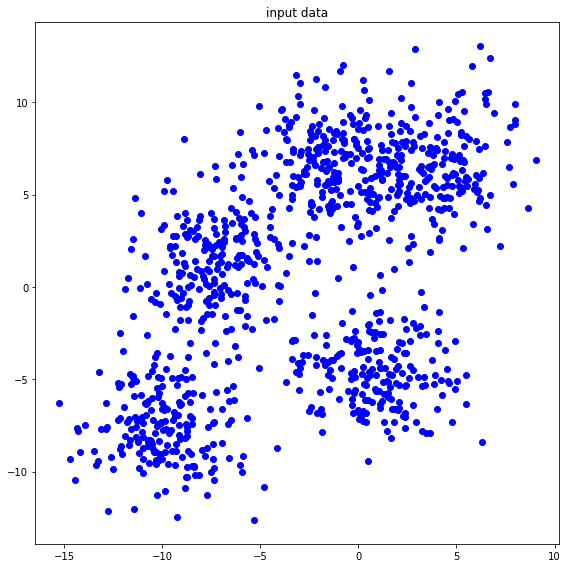

In [359]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'bo')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [360]:
def compute_distance(feature, center):
    
    distance = np.zeros(num_data)
    
    for i in range(0, num_data):
        distance[i] = np.sum((feature[i] - center)**2)
        
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [361]:
def compute_centroid(feature, label_feature, value_label):
    
    sum_point = np.zeros(num_feature)
    num_data_in_cluster = len(label_feature[label_feature == value_label])

    if num_data_in_cluster == 0:
        return -1
          
    cluster_points = feature[np.where(label_feature == value_label)]
    
    sum_points = np.sum(cluster_points, axis = 0)

    centroid = sum_points / num_data_in_cluster
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [362]:
def compute_label(distance):
    
    index_label_feature = np.zeros(num_data)
    
    for i in range(0, num_data):
        index_label_feature[i] = np.argmin(distance[i])

    return index_label_feature

In [383]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 100
# ===================================================

In [384]:
distance            = np.zeros(shape=(num_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, num_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, num_feature))

# label_feature = np.zeros(num_data)
label_feature = np.random.choice(number_cluster, num_data)
label_cluster = np.arange(0, number_cluster, 1)
        
loss = 0

for i in range(number_iteration):
    loss = 0
    for k in range(len(label_cluster)):
        num_data_in_cluster = len(label_feature[label_feature == k])
        if num_data_in_cluster != 0:
            centroid[k] = compute_centroid(feature, label_feature, k)
        distance[:, k] = compute_distance(feature, centroid[k])
        loss += np.sum(distance[np.where(label_feature == k), k])
        
    label_feature = compute_label(distance)
    loss_iteration[i, :] = loss / num_data
    centroid_iteration[i] = centroid

## plot the results

In [385]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    
    plt.plot(x, y, 'bo')
    
    plt.tight_layout()
    plt.show()

In [386]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    iteration = np.arange(0, number_iteration, 1)
    plt.plot(iteration, loss_iteration, '-', color = 'red')
    
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [387]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    random_color = np.array(np.random.choice(range(256), size=3*number_cluster)) / 256
    
    for i in range(0, number_cluster):
        random_one_color = random_color[i*3:i*3+3]
        plt.plot(centroid_iteration[:,i,0],centroid_iteration[:,i,1], '-', color = random_one_color, label=f"cluster={i}")
        
    plt.plot(centroid_iteration[0,:,0], centroid_iteration[0,:,1], 'bo', label = "initial")
    plt.plot(centroid_iteration[number_iteration-1,:,0], centroid_iteration[number_iteration-1,:,1], 'rs', label = "final")

    plt.legend()
    plt.tight_layout()
    plt.show()

In [388]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')

    plt.scatter(feature[:,0], feature[:,1], c=label_feature, cmap=plt.cm.get_cmap('rainbow', number_cluster))
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    plt.clim(-0.5, number_cluster - 0.5)
    
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

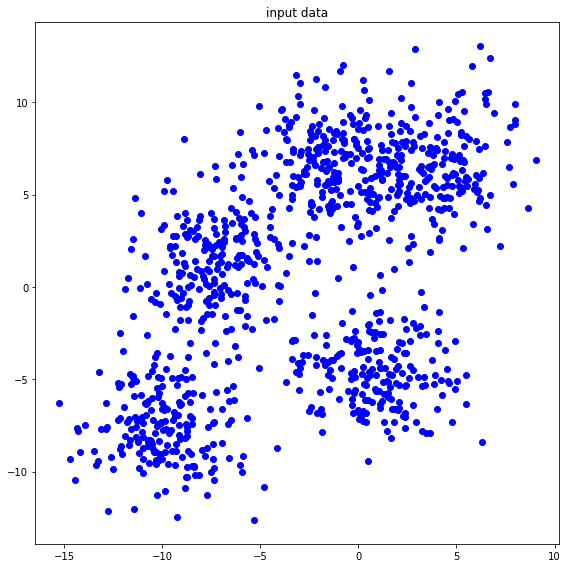

In [379]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

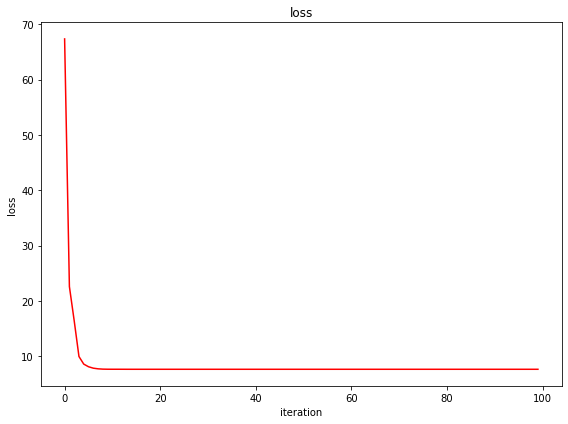

In [380]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

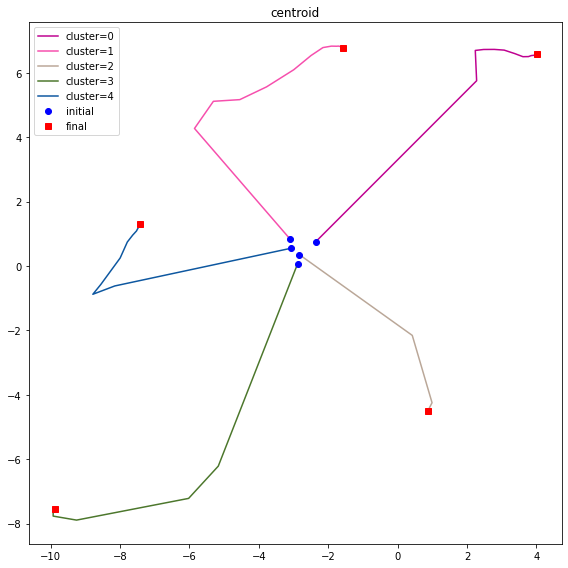

In [381]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

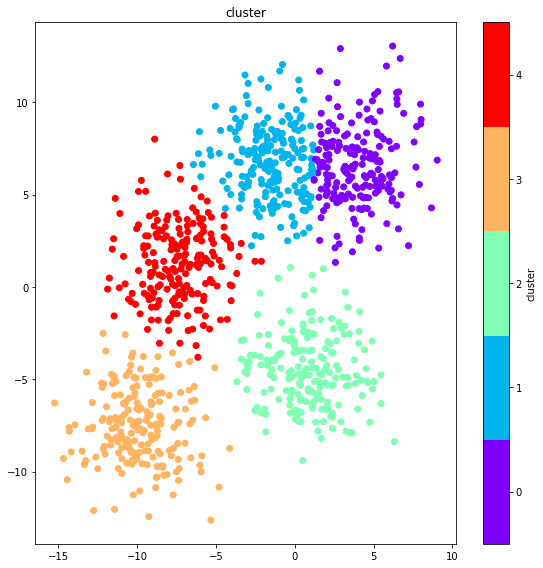

In [382]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

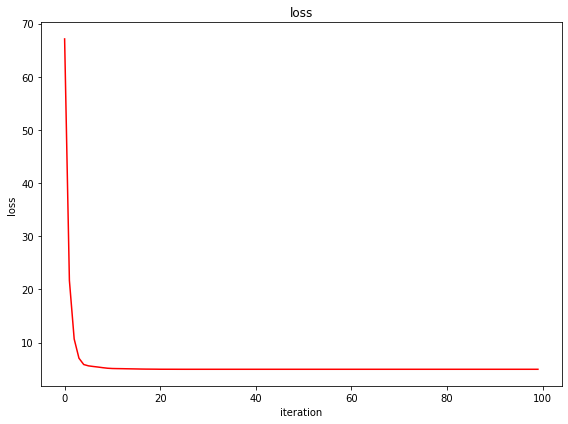

In [389]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

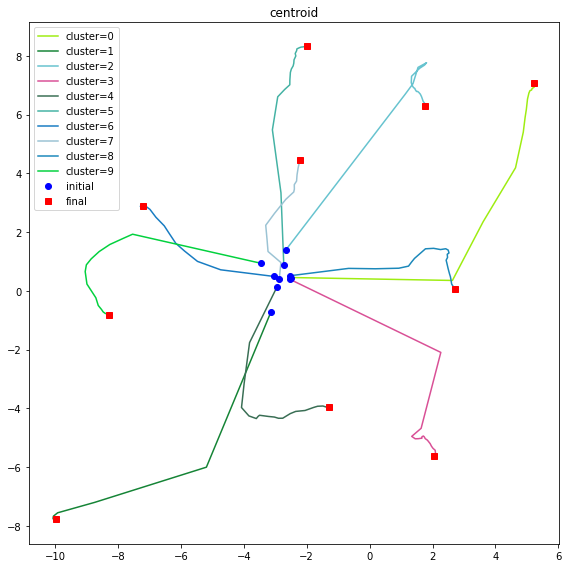

In [390]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

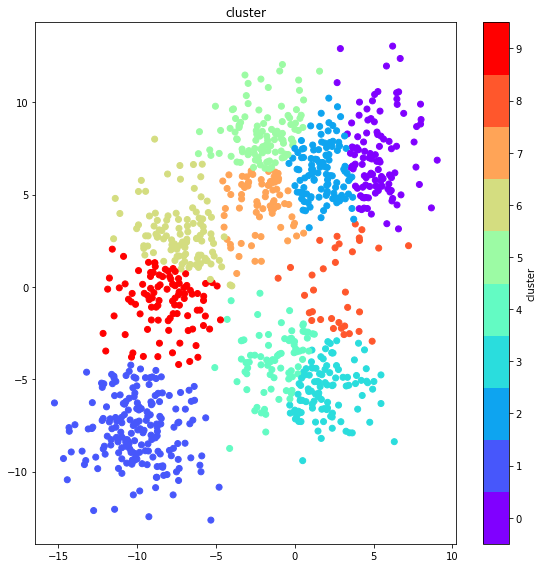

In [391]:
plot_cluster(feature, label_feature, label_cluster)

***